<a href="https://colab.research.google.com/github/jaffaraleem/LMS-Algorithm/blob/main/LMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the necessary libraries
import h5py
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import math

In [ ]:
#Loading the data file
DATA_FILE = '/content/drive/MyDrive/Colab Notebooks/ee541/HW3/lms_fun_v3.hdf5'

In [ ]:
#Checking the keys of the hd5 file
hf = h5py.File(DATA_FILE, 'r') 
keys = hf.keys()
print([key for key in keys])

['matched_10_v', 'matched_10_x', 'matched_10_y', 'matched_10_z', 'matched_3_v', 'matched_3_x', 'matched_3_y', 'matched_3_z', 'mismatched_v', 'mismatched_x', 'mismatched_y', 'timevarying_coefficents', 'timevarying_v', 'timevarying_x', 'timevarying_y', 'timevarying_z']


In [ ]:
#Loading the input and noisy output array
input_v_10 = hf['matched_10_v'][:]
output_z_10 = hf['matched_10_z'][:]

input_v_3 = hf['matched_3_v'][:]
output_z_3 = hf['matched_3_z'][:]

In [ ]:
#Generating plot for values of w on 1st sample
def claculate_weights_on_first_sample(Y,X,learning_rate, plt_label):
  weights = [[0,0,0]]
  for i in range(0,501):
    weight_n = np.array(weights[i]).reshape(3,1)
    expected_y = weight_n.T @ X[i].reshape(3,1)
    err = Y[i] -  expected_y[0][0]

    weight_n_1 = weight_n + learning_rate*err*X[i].reshape(3,1)

    weight_n_1_squeezed = weight_n_1.squeeze()
    weights.append(list(weight_n_1_squeezed))

  w0 = [i[0] for i in weights[:501]]
  w1 = [i[1] for i in weights[:501]]
  w2 = [i[2] for i in weights[:501]]

  plt.plot(range(0,501),w0, label = "w0")
  plt.plot(range(0,501),w1, label = "w1")
  plt.plot(range(0,501),w2, label="w2")
  plt.xlabel("Update")
  plt.ylabel("w Estimates")
  plt.title(plt_label)
  plt.legend()
  plt.show()
  

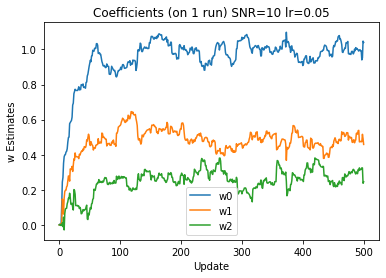

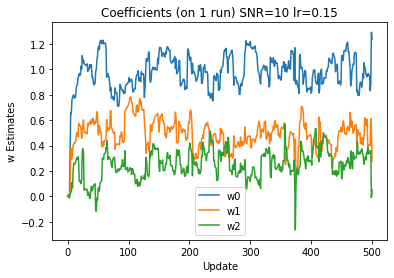

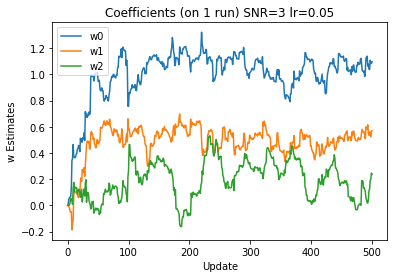

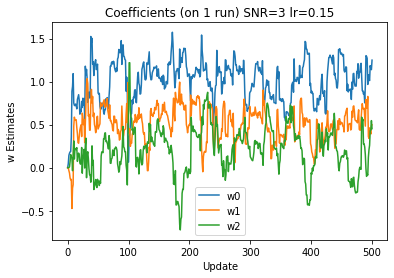

In [ ]:
#Generate plot of w on 1st sample with different learning rates and SNR
claculate_weights_on_first_sample(output_z_10[0],input_v_10[0], 0.05, "Coefficients (on 1 run) SNR=10 lr=0.05")
claculate_weights_on_first_sample(output_z_10[0],input_v_10[0], 0.15, "Coefficients (on 1 run) SNR=10 lr=0.15")
claculate_weights_on_first_sample(output_z_3[0],input_v_3[0], 0.05, "Coefficients (on 1 run) SNR=3 lr=0.05")
claculate_weights_on_first_sample(output_z_3[0],input_v_3[0], 0.15, "Coefficients (on 1 run) SNR=3 lr=0.15")

In [ ]:
#Calculate the value of W over all the samples
def calculate_weights_error(Y,X,learning_rate):
  weights = [[0,0,0]]
  err_arr = []
  for i in range(0,501):
    weight_n = np.array(weights[i]).reshape(3,1)
    expected_y = weight_n.T @ X[i].reshape(3,1)
    err = Y[i] -  expected_y[0][0]
    
    err_arr.append(err**2)
    
    weight_n_1 = weight_n + learning_rate*err*X[i].reshape(3,1)

    weight_n_1_squeezed = weight_n_1.squeeze()
    weights.append(list(weight_n_1_squeezed))

  return (weights[:501], err_arr)

In [ ]:
#Generate the needed plots
def plot_graph(weights, plt_label):
    w0 = [i[0] for i in weights]
    w1 = [i[1] for i in weights]
    w2 = [i[2] for i in weights]
    plt.plot(range(0,501),w0, label="w0")
    plt.plot(range(0,501),w1, label="w1")
    plt.plot(range(0,501),w2, label="w2")
    plt.xlabel("Update")
    plt.ylabel("w Estimates")
    plt.title(plt_label)
    plt.legend()
    plt.show()

In [ ]:
#Calculates the weights and error for all 501 points in all 600 samples
def generate_weight_error_array(Y,X,lr):
  weights = []
  error = []
  for i in range(0,600):
    w, e = calculate_weights_error(Y[i], X[i], lr)
    weights.append(w)
    error.append(e)
  return (weights, error)

In [ ]:
#Creates the plot of weights vs update
def plot_weight_graph(weights, plt_title):
  avg_weights = []
  for i in range(0,501):
    w0=0
    w1=0
    w2=0
    for j in range(0,600):
      w0+= weights[j][i][0]
      w1+= weights[j][i][1]
      w2+= weights[j][i][2]
    avg_weights.append([w0/600,w1/600,w2/600])
  plot_graph(avg_weights, plt_title)

In [ ]:
#Creates the plot of mse vs update
def plot_error_graph(error,plt_title):
  avg_error = []
  for i in range(0,501):
    s=0
    for j in range(0,600):
      s+= error[j][i]
    avg_error.append(s/600)

  e = [10*math.log10(i) for i in avg_error]

  plt.plot(range(0,501),e)
  plt.xlabel("Update")
  plt.ylabel("MSE (dB)")
  plt.title(plt_title)
  plt.show()

In [ ]:
#To generate all the neede curves
def generate_curves(Y,X,lr, title1, title2):
  weights, errors = generate_weight_error_array(Y,X,lr)
  plot_weight_graph(weights, title1)
  plot_error_graph(errors, title2)

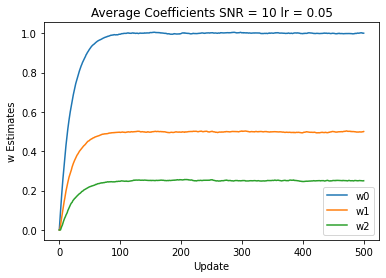

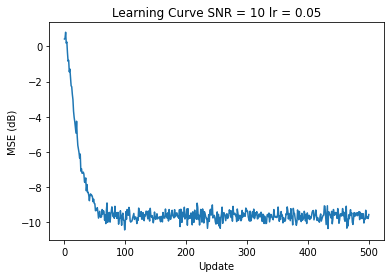

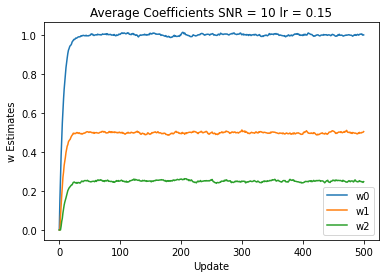

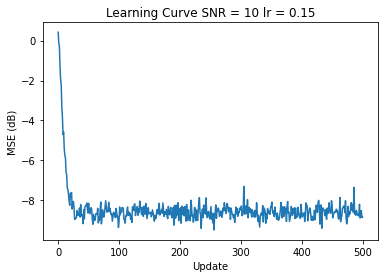

In [ ]:
#Curves for Matched signal with SNR = 10 and learning rate = 0.05 and 0.15
generate_curves(output_z_10, input_v_10, 0.05, "Average Coefficients SNR = 10 lr = 0.05","Learning Curve SNR = 10 lr = 0.05")
generate_curves(output_z_10, input_v_10, 0.15, "Average Coefficients SNR = 10 lr = 0.15","Learning Curve SNR = 10 lr = 0.15")

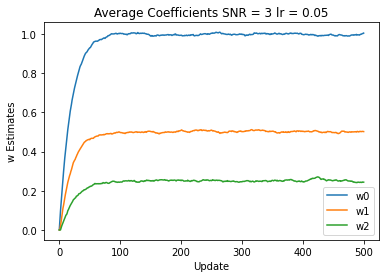

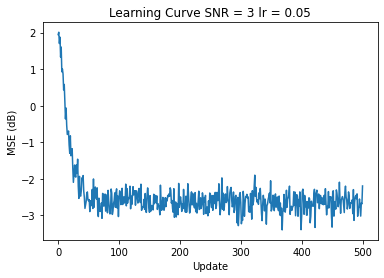

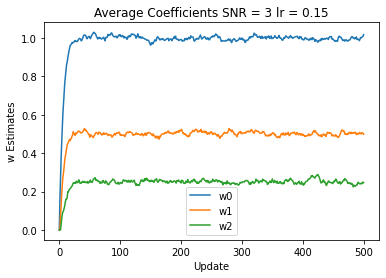

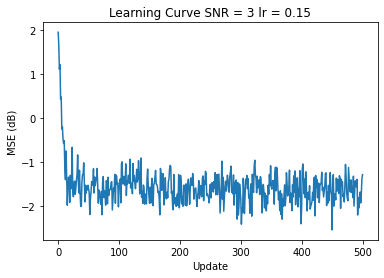

In [ ]:
#Curves for Matched signal with SNR = 3 and learning rate = 0.05 and 0.15
generate_curves(output_z_3, input_v_3, 0.05, "Average Coefficients SNR = 3 lr = 0.05","Learning Curve SNR = 3 lr = 0.05")
generate_curves(output_z_3, input_v_3, 0.15, "Average Coefficients SNR = 3 lr = 0.15","Learning Curve SNR = 3 lr = 0.15")

In [ ]:
#Part 3b

In [ ]:
#Loading the timevarying data
timevarying_coefficents = hf["timevarying_coefficents"][:]
timevarying_v = hf["timevarying_v"][:]
timevarying_z = hf["timevarying_z"][:]

In [ ]:
#Creating a list of all the different values of each coefficient
w0 = [timevarying_coefficents[i][0] for i in range(0,501)]
w1 = [timevarying_coefficents[i][1] for i in range(0,501)]
w2 = [timevarying_coefficents[i][2] for i in range(0,501)]

In [ ]:
#Running the lms algorithm to calculate the coefficients
coefficients, error = calculate_weights_error(timevarying_z, timevarying_v ,0.06)
c0 = [coefficients[i][0] for i in range(0,501)]
c1 = [coefficients[i][1] for i in range(0,501)]
c2 = [coefficients[i][2] for i in range(0,501)]

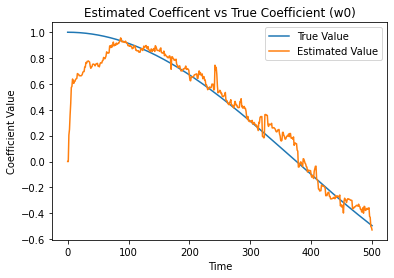

In [ ]:
#Plotting coefficient 1
plt.plot(range(0,501), w0, label="True Value")
plt.plot(range(0,501), c0, label="Estimated Value")

plt.xlabel("Time")
plt.ylabel("Coefficient Value")
plt.title("Estimated Coefficent vs True Coefficient (w0)")
plt.legend()

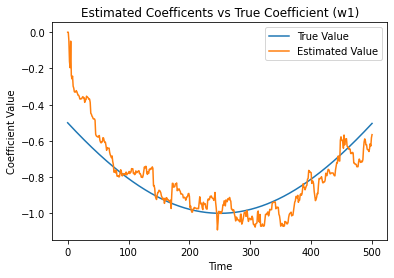

In [ ]:
#Plotting coefficient 2
plt.plot(range(0,501), w1, label="True Value")
plt.plot(range(0,501), c1, label="Estimated Value")

plt.xlabel("Time")
plt.ylabel("Coefficient Value")
plt.title("Estimated Coefficents vs True Coefficient (w1)")
plt.legend()

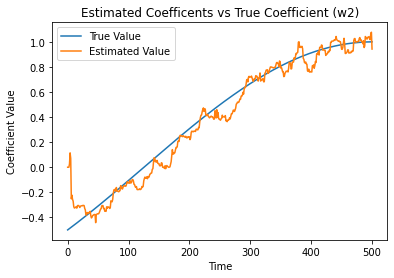

In [ ]:
#Plotting coefficient 3
plt.plot(range(0,501), w2, label="True Value")
plt.plot(range(0,501), c2, label="Estimated Value")

plt.xlabel("Time")
plt.ylabel("Coefficient Value")
plt.title("Estimated Coefficents vs True Coefficient (w2)")
plt.legend()

In [ ]:
#Part 3c

In [ ]:
#Loading the data
mismatched_v = hf['mismatched_v'][:]
mismatched_y = hf["mismatched_y"][:]

In [ ]:
#Function to calculate W LMMSE
def W_LMMSE(Y,V):
  RV = 1/501*(V.T @ V)
  RV_INV = inv(RV)
  Y_Reshaped = Y.reshape(501,1)
  rVY = 1/501*(V.T @ Y_Reshaped)
  W_LMMSE = RV_INV @ rVY
  return W_LMMSE

In [ ]:
#Function to calculate the error
def error_LLSE(Y,V,W_LMMSE):
  y_hat = W_LMMSE.T @ V.T
  y_reshaped = Y.reshape(501,1)
  error = y_reshaped.T - y_hat
  e = list(error.squeeze())
  ese = [i**2 for i in e]
  return ese

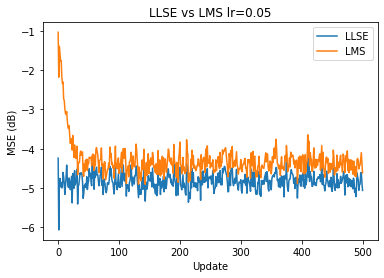

In [ ]:
#Running the LLSE algorithm and plotting against LMS Algorithm
error_list = []
for i in range(0,600):
  W = W_LMMSE(mismatched_y[i], mismatched_v[i])
  E = error_LLSE(mismatched_y[i], mismatched_v[i], W)
  error_list.append(E)

avg_error = []
for i in range(0,501):
  s=0
  for j in range(0,600):
    s+= error_list[j][i]
  avg_error.append(s/600)

weights, errors = generate_weight_error_array(mismatched_y, mismatched_v, 0.05,)
avg_error_LMS = []
for i in range(0,501):
  s=0
  for j in range(0,600):
    s+= errors[j][i]
  avg_error_LMS.append(s/600)
e_llse = [10*math.log10(i) for i in avg_error]
e_lms = [10*math.log10(i) for i in avg_error_LMS]
plt.plot(range(0,501),e_llse, label="LLSE")
plt.plot(range(0,501),e_lms, label="LMS")
plt.xlabel("Update")
plt.ylabel("MSE (dB)")
plt.title("LLSE vs LMS lr=0.05")
plt.legend()
plt.show()


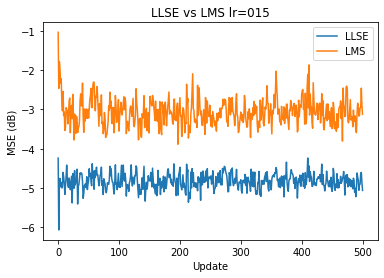

In [ ]:
#Running the LLSE algorithm and plotting against LMS Algorithm
weights, errors = generate_weight_error_array(mismatched_y, mismatched_v, 0.15,)
avg_error_LMS = []
for i in range(0,501):
  s=0
  for j in range(0,600):
    s+= errors[j][i]
  avg_error_LMS.append(s/600)

e_lms = [10*math.log10(i) for i in avg_error_LMS]

plt.plot(range(0,501),e_llse, label="LLSE")
plt.plot(range(0,501),e_lms, label="LMS")
plt.xlabel("Update")
plt.ylabel("MSE (dB)")
plt.title("LLSE vs LMS lr=015")
plt.legend()
plt.show()